# Mini Assignment 9
Section 1:

This file will be merging two sources of data from 'Our world data' and 'John Hopkins data', this is because we would like to conduct EDA and create visualisations using the number of recovered cases which is only available in John Hopkin's data set. 

After merging the two data sets, i'll subset the data for United States only as this is agreed by the team that i'll be conducting analysis on US only. 
Then the following graphs will be presented graphs for 
1. New cases each day
2. New deaths each day
3. New recovery each day
4. New Testing each day

Followed by calculating the CFR and plot the death rate for each day on a time series plot for visualisation.
CFR is calculated using this formula:

>$CFR=\frac{Number of deaths of disease}{Number of confirmed}* 100$

Following some analysis on new found data by sex/age will be conducted for visualisations.

Section 2:

Infection Fatility Rate will be calculated for United States and the Confidence Interval will be calculated too.

>$IFR=\frac{Number of deaths }{Number of Infected}* 100$



### Section 2
### Import libraies

!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from datetime import *
import plotly.io as pio
pio.renderers.default = "png"

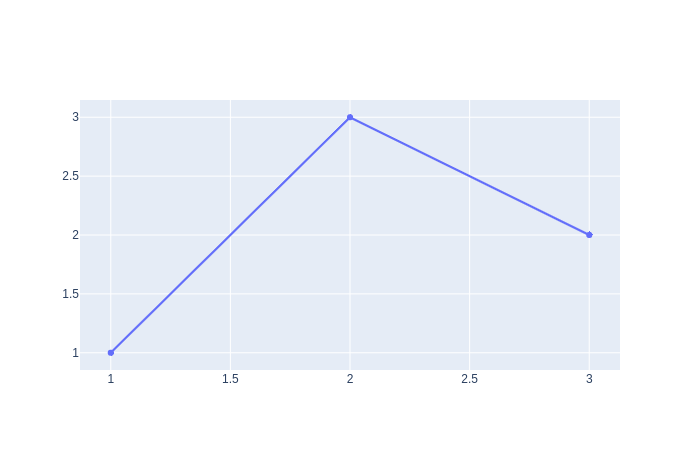

In [2]:


fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
fig.show(render='png')

Read in 'Our World Data' as df and read in recovery data from John Hopkins as jh_recovered.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [4]:
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Change the date values into date format and for preparation of merging the two data sets the data is formatted into %m/%d/%y. Repeat this for both data sets.

In [6]:
df['date']=pd.to_datetime(df['date'], errors='ignore')

In [7]:
 #df["date"]= df["date"].dt.strftime("%m/%d/%y")

In [8]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


for the John Hopkin's data set we need to transform the dataframe from wide to long format using the melt function so that the dataframe is consistent.

In [9]:
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'recovered')


In [10]:
jh_recovered2['date']=pd.to_datetime(jh_recovered2['date'], errors='ignore')


In [11]:
 #jh_recovered2["date"]= jh_recovered2["date"].dt.strftime("%m/%d/%y")

Before we can merge, as the first dataset cummulates all data for each country, we need to remove the "States" in the Johns Hopkins dataset and sum the recovery cases so we can obtain the recovery cases for an entire country and not have it split up into Provinces/States.


In [12]:
jh_recovered2=jh_recovered2.drop(["Province/State","Lat","Long"], axis=1)


In [13]:
jh_recovered2_grouped=jh_recovered2.groupby(["Country/Region","date"]).sum()


The country names are inconsistent between the 2 files hence we will replace the names in the john hopkins file to match the other dataset.

In [14]:
jh_recovered2['Country/Region'] = jh_recovered2['Country/Region'].replace(['US'],'United States')

Merge the two data sets based on the 'location' & 'date' variables in the 'Our World data' and 'Country/Region' & 'date' variables in the John Hopkins data.

In [15]:
merge1=df.merge(jh_recovered2, how='inner', left_on=["location", "date"], right_on=["Country/Region","date"])

In [16]:
merge1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Country/Region,recovered
0,AFG,Asia,Afghanistan,2020-01-22,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
1,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
2,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
3,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
4,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0


Subset the dataset with location/country code being 'USA' since this is the country I was assigned to conduct EDA and investigate in.

In [17]:
us=merge1.loc[merge1['iso_code'] == "USA"]

In [18]:
us.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Country/Region,recovered
58424,USA,North America,United States,2020-01-22,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0
58425,USA,North America,United States,2020-01-23,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0
58426,USA,North America,United States,2020-01-24,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0
58427,USA,North America,United States,2020-01-25,2.0,1.0,0.286,NaN,0.0,0.0,0.006,0.003,0.001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0
58428,USA,North America,United States,2020-01-26,2.0,0.0,0.286,NaN,0.0,0.0,0.006,0.000,0.001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0


Add new column called 'new_recover' that calculates the cumulative recoverd cases from the 'recovered' variable, so that each value in 'new_recover' is a daily value.

In [19]:
us['new_recover'] = us['recovered'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There exist a negative value for recovered cases, change that to zero first .. WIP

In [20]:
us['new_recover'].min()

-2446.0

### EDA
The following is the graph for new confirmed cases by dates and the smoothed version

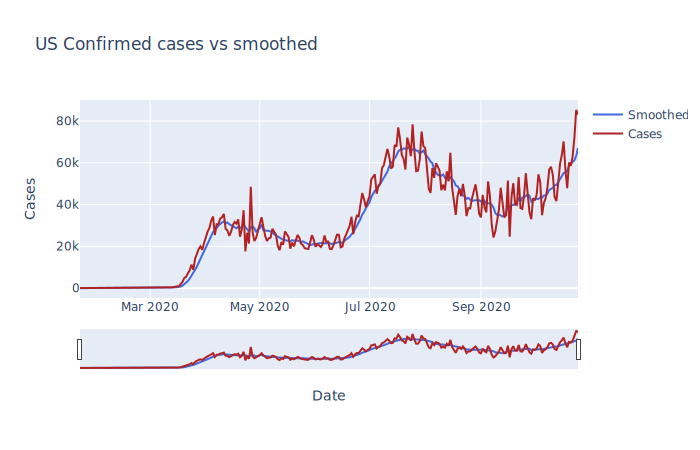

In [22]:


fig1 = go.Figure()
# Create and style traces

fig1.add_trace(go.Scatter(x=us['date'], y=us['new_cases_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))


fig1.add_trace(go.Scatter(x=us['date'], y=us['new_cases'], name = 'Cases',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig1.update_layout(title='US Confirmed cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig1.update_xaxes(rangeslider_visible=True)
#fig1.show()
fig1.show(renderer="png")

New deaths by dates

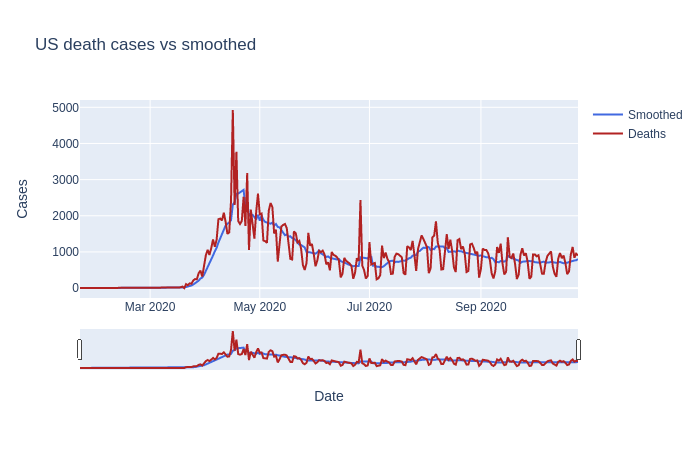

In [23]:

fig2 = go.Figure()
# Create and style traces

fig2.add_trace(go.Scatter(x=us['date'], y=us['new_deaths_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))


fig2.add_trace(go.Scatter(x=us['date'], y=us['new_deaths'], name = 'Deaths',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig2.update_layout(title='US death cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

New recovered cases by dates

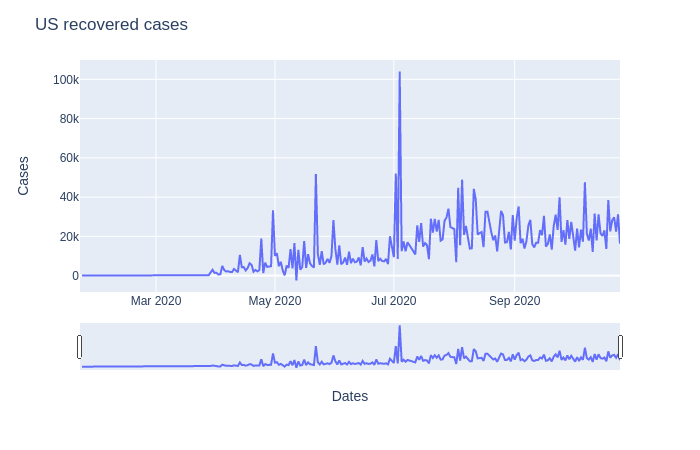

In [24]:
fig3 = px.line(us, x='date', y="new_recover")
fig3.update_xaxes(rangeslider_visible=True)
fig3.update_layout(title='US recovered cases',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig3.show()



Notice ubove new recovered cases by date has one negative value due to corrections being made in the data set.

New test cases by dates

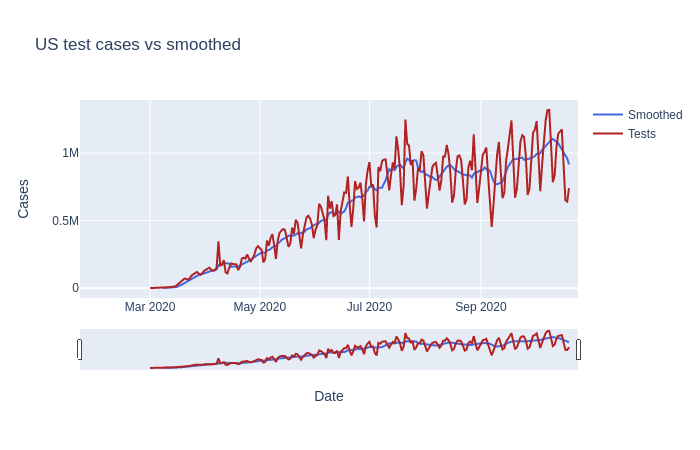

In [25]:
fig4 = go.Figure()
# Create and style traces

fig4.add_trace(go.Scatter(x=us['date'], y=us['new_tests_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))


fig4.add_trace(go.Scatter(x=us['date'], y=us['new_tests'], name = 'Tests',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig4.update_layout(title='US test cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

Graphing all 4 together in one graph for comparison.

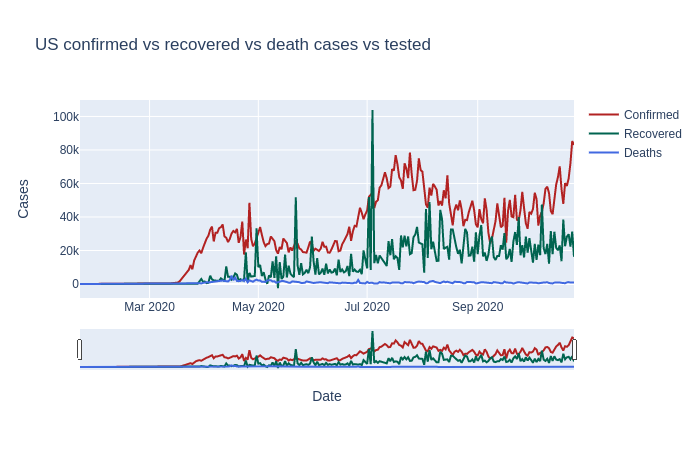

In [26]:

fig5 = go.Figure()
# Create and style traces
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_cases'], name='Confirmed',
                         line=dict(color='firebrick', width=2)))
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_recover'], name = 'Recovered',
                         line=dict(color='rgb(0,100,80)', width=2)))
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_deaths'], name = 'Deaths',
                         line=dict(color='royalblue', width=2)))
#REMOVED TEST BECAUSE IT MAKES THE OTHER LINES HARD TO SEE
'''
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_tests'], name = 'Tests',
                         line=dict(color='goldenrod', width=4)))
'''
# Edit the layout
fig5.update_layout(title='US confirmed vs recovered vs death cases vs tested',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig5.update_xaxes(rangeslider_visible=True)
fig5.show()

Now we will calculate the death rate using CFR method as mentioned above for everyday and graph it on a time series plot. We willcalculate and graph both the smoothed and unsmoothed CFR.

In [27]:
us['CFR']=(us['new_deaths']/(us['new_cases']))*100
us['total_CFR']=(us['total_deaths']/(us['total_cases']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



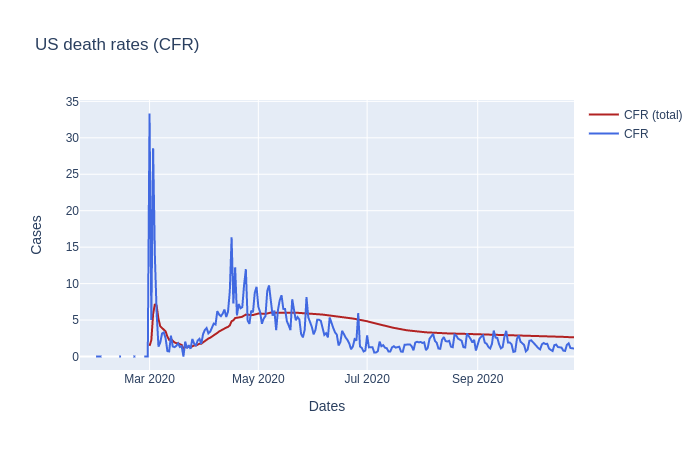

In [28]:
fig6 = go.Figure()
# Create and style traces
fig6.add_trace(go.Scatter(x=us['date'], y=us['total_CFR'], name='CFR (total)',
                         line=dict(color='firebrick', width=2)))
fig6.add_trace(go.Scatter(x=us['date'], y=us['CFR'], name='CFR',
                         line=dict(color='royalblue', width=2)))
fig6.update_layout(title='US death rates (CFR)',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig6.show()



In the graph, we can see that the smoothed CFR can see the trends much more clearer and have reduced the outliers shown by the extreme spikes, which may have been corrections of data. We can also visualise that left hand side has a much more severe death rate than the right hand side. Right hand side seems to be stablising. Hence we will calculated 2 separate death rates to compare how different are the 2 values.


In [29]:
us['total_CFR'].describe()

count    239.000000
mean       3.930347
std        1.417583
min        1.052632
25%        2.909015
50%        3.428813
75%        5.451742
max        7.200000
Name: total_CFR, dtype: float64

From the times series plot and the statistics description we can observe that the inital few months of death rate is very high. From March it surged drastically then steep drop when approaching April. But soon the CFR rises in April again after the drop, when reaching May it has been slowly declining and stablising in July till October.


In [30]:
#Overall death rate & 2 stages death rate
CFR_overall=us['total_deaths'].max()/us['total_cases'].max()*100

In [31]:
round(CFR_overall,2)

2.62

In [32]:
#checking the data set
'''from google.colab import files
us.to_csv('usa.csv') 
files.download('usa.csv')'''

"from google.colab import files\nus.to_csv('usa.csv') \nfiles.download('usa.csv')"

In [33]:
us['date']=pd.to_datetime(us['date'], errors='ignore').dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
us.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Country/Region,recovered,new_recover,CFR,total_CFR
58424,USA,North America,United States,2020-01-22,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0,NaN,NaN,NaN
58425,USA,North America,United States,2020-01-23,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0,0.0,NaN,NaN
58426,USA,North America,United States,2020-01-24,1.0,0.0,0.143,NaN,0.0,0.0,0.003,0.000,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0,0.0,NaN,NaN
58427,USA,North America,United States,2020-01-25,2.0,1.0,0.286,NaN,0.0,0.0,0.006,0.003,0.001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0,0.0,0.0,NaN
58428,USA,North America,United States,2020-01-26,2.0,0.0,0.286,NaN,0.0,0.0,0.006,0.000,0.001,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,United States,0,0.0,NaN,NaN


Calculate the death rate in stage/section 1 on the left hand side, the two stages were split with the date 2020/07/01. Define the death rate for stage 1 as 'CFR1'.

In [35]:
#for section 1 death rate
#us['date']<date(2020,5,19)

tot_death1=us[['new_deaths']].where(us['date'] < date(2020,7,1), 0).sum(axis=0).max()
tot_confirmed1=us[['new_cases']].where(us['date'] < date(2020,7,1), 0).sum(axis=0).max()

CFR1=tot_death1/(tot_confirmed1)*100

In [36]:
round(CFR1,2)


4.87

Now repeating the above process to calculated the second CFR rate.

In [37]:
#for section 2 death rate
tot_death2=us[['new_deaths']].where(us['date'] > date(2020,5,19), 0).sum(axis=0).max()
tot_confirmed2=us[['new_cases']].where(us['date'] > date(2020,5,19), 0).sum(axis=0).max()

CFR2=tot_death1/(tot_confirmed2)*100

In [38]:
round(CFR2,2)

1.78

In [39]:
round(CFR_overall,2)

2.62

By comparing the 3 different death rates we can clearly see the big differences between them. CFR1 is exceptionally high with a death rate of 4.87%, but in stage 2 we can see the death rate declines to 1.85%. And if we calculate the overall ongoing CFR rate it is around 2.67%.

# New data set- exploration within USA
This following dataset is to investigate further into the factors that influence death rates in USA, including sex, age.

First we import the data as per below.

In [40]:
from google.colab import files
data_to_load = files.upload()

In [41]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['Dataset (2).csv']))

KeyError: ignored

In [ ]:
usa=data[data['Country']=='USA']

In [ ]:
india=data[data['Country']=='India']

In [ ]:
brazil=data[data['Country']=='Brazil']

In [ ]:
russia=data[data['Country']=='Russia']

In [ ]:
sa=data[data['Country']=='South Africa']

In [ ]:
usa

,Country code,Country,Case & death data by sex?,Cases date,Cases where sex-disaggregated data is available,Cases (% male),Cases (% female),Deaths date,Deaths where sex-disaggregated data is available,Deaths (% male),Deaths (% female),Deaths in confirmed cases date,Proportion of deaths in confirmed cases (male),Proportion of deaths in confirmed cases (female),Proportion of deaths in confirmed cases (Male:female ratio),Source
172,US,USA,Yes,2020/10/12,5706415.0,48.3%,51.7%,2020/10/03,198804.0,54.06%,45.94%,2020/09/30,4.14%,3.29%,1.26,https://www.cdc.gov/covid-data-tracker/index.h...


In [ ]:

fig = px.histogram(usa, x=["Cases (% male)","Cases (% female)"], histnorm='probability density')
#fig.data[0].text = x
#fig.update_traces(textposition='inside', textfont_size=8)
fig.show()

# Section 2: Infection Fatility Rates

After some researches and team discussion, we reached to a conclusion that Infection Fatility Rates (IFR) are the best to calculate the true severity of COVID which answeres the driving question- how deadly is COVID? 

Here, we found a new dataset for the estimated Infection cases and we will import them in. 

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving daily-new-estimated-infections-of-covid-19.csv to daily-new-estimated-infections-of-covid-19.csv


In [ ]:
import io
inf = pd.read_csv(io.BytesIO(data_to_load['daily-new-estimated-infections-of-covid-19.csv']))

In [ ]:
inf.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN,NaN


Next we will subset the USA data only for analysis purpose.

In [ ]:
usa_inf=inf[inf['Code']=='USA']

In [ ]:
usa_inf.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
55959,United States,USA,2020-01-02,0.00000,NaN,NaN,NaN,NaN,NaN
55960,United States,USA,2020-01-03,0.00000,NaN,NaN,NaN,NaN,NaN
55961,United States,USA,2020-01-04,0.00000,NaN,NaN,NaN,NaN,NaN
55962,United States,USA,2020-01-05,0.00000,NaN,NaN,NaN,NaN,NaN
55963,United States,USA,2020-01-06,0.00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
56250,United States,USA,2020-10-19,56007.28571,NaN,NaN,NaN,NaN,NaN
56251,United States,USA,2020-10-20,58651.14286,NaN,NaN,NaN,NaN,NaN
56252,United States,USA,2020-10-21,59512.85714,NaN,NaN,NaN,NaN,NaN
56253,United States,USA,2020-10-22,60026.00000,NaN,NaN,NaN,NaN,NaN


Graphing a visualisation of the 4 model's estimated infection cases for USA.

In [ ]:
fig7 = go.Figure()
# Create and style traces
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (ICL, mean)'], name='ICL',
                         line=dict(color='firebrick', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (IHME, mean)'], name = 'IHME',
                         line=dict(color='rgb(0,100,80)', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (YYG, mean)'], name = 'YYG',
                         line=dict(color='royalblue', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (LSHTM, median)'], name = 'LSHTM',
                         line=dict(color='goldenrod', width=2)))

# Edit the layout
fig7.update_layout(title='USA Infection Cases 4 models estimation',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig7.update_xaxes(rangeslider_visible=True)
fig7.show()

Now calculate the IFR using the formulastated in the beginning and compare the variances between each models.

In [ ]:
us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (ICL, mean)'].sum()*100

0.4901579057212269

In [ ]:
us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (IHME, mean)'].sum()*100

0.7519410338639347

In [ ]:
us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (LSHTM, median)'].sum()*100

0.7213355258297552

This is the optimised model for US. 
https://ourworldindata.org/covid-models

In [ ]:
final_us_IFR=us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (YYG, mean)'].sum()*100

Since the YYG model is the most optimised model to estimate infection rate for US, we will now import the data that includes the mean, upper and lower bounds for YYG model.

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving daily-new-estimated-covid-19-infections-yyg-model.csv to daily-new-estimated-covid-19-infections-yyg-model.csv


In [ ]:
import io
yyg = pd.read_csv(io.BytesIO(data_to_load['daily-new-estimated-covid-19-infections-yyg-model.csv']))

In [ ]:
yyg.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (YYG, lower)","Daily new estimated infections of COVID-19 (YYG, upper)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN


Again, in this file we are only interested in analysing US data, hence we will subset out US.

In [ ]:
usa_yyg=yyg[yyg['Code']=='USA']

Graph the YYG estimated Infection cases in US - the mean, upper, lower bounds.

In [ ]:
fig8 = go.Figure()
# Create and style traces
fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, mean)'], name='YYG(mean)',
                         line=dict(color='firebrick', width=2)))
fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, lower)'], name='YYG(lower)',
                         line=dict(color='blue', width=2)))

fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, upper)'], name='YYG(upper)',
                         line=dict(color='blue', width=2)))


# Edit the layout
fig8.update_layout(title='USA Infection Cases YYG Model',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig8.update_xaxes(rangeslider_visible=True)
fig8.show()

### IFR and its Confidence Interval
Now we will calcuate the IFR for USA with the following formula with data obtained form the YYG model.
>$IFR=\frac{Number of deaths }{Number of Infected}* 100$

In [ ]:
yyg_IFR=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, mean)'].sum()*100

In [ ]:
yyg_IFR

0.41841946505707583

Now we will calculate the error using the upper and lower bounds to find our the confidence interval fro the IFR value.

In [ ]:
yyg_IFR_lower=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, lower)'].sum()*100

In [ ]:
yyg_IFR_lower

0.5932546766253263

In [ ]:
yyg_IFR_upper=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, upper)'].sum()*100

In [ ]:
yyg_IFR_upper

0.3037713217593973

In [ ]:
(yyg_IFR_upper+yyg_IFR_lower)/2

0.44851299919236176

The final IFR for United States is $0.418$%+/-$0.449$%.